In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Get the latest data from the Chicago data portal right now
%run "Get beach_days from API.ipynb"
beach_days.head()

Deleting columns: 
There are 20 beaches


,dna_reading_mean,dna_test_id,location,date,beach_name,predicted_level
0,162.628411,3083,"{'type': 'Point', 'coordinates': [-87.5299, 41...",2017-06-23,Calumet,NaN
1,538.273165,3192,"{'type': 'Point', 'coordinates': [-87.6545, 41...",2017-06-23,Osterman,290.3
2,1386.880673,3190,"{'type': 'Point', 'coordinates': [-87.6385, 41...",2017-06-23,Montrose,NaN
3,5393.683435,3205,"{'type': 'Point', 'coordinates': [-87.5748, 41...",2017-06-23,63rd Street,NaN
4,203.749847,3191,"{'type': 'Point', 'coordinates': [-87.6515, 41...",2017-06-23,Foster,275.0


In [4]:
# How many days of samples were taken
print("Samples were taken across %s days" % len(beach_days['date'].unique()))

Samples were taken across 29 days


In [5]:
print("There are %s total beach-days, and %s unique predictions" %
     (str(len(beach_days)), str(len(beach_days.loc[~beach_days['predicted_level'].isnull()]))))

There are 573 total beach-days, and 399 unique predictions


In [6]:
print("There were %s samples predicted above the threshold, and %s that actually were" %
     (str(len(beach_days.loc[beach_days['predicted_level'] > 1000])),
      str(len(beach_days.loc[beach_days['dna_reading_mean'] > 1000]))))

There were 0 samples predicted above the threshold, and 41 that actually were


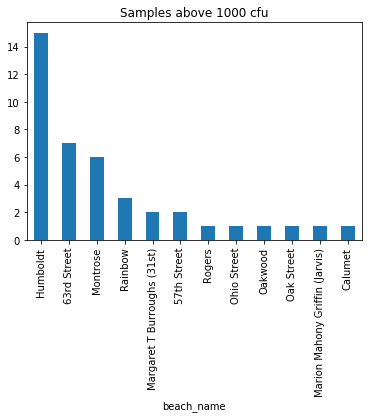

In [7]:
# For the DNA testing, the threshold for an advisory is 1000 CFU.  How many beaches exceed that?
beach_days.loc[beach_days['dna_reading_mean'] >= 1000].groupby('beach_name').count()['date']\
    .sort_values(ascending=False).plot(kind="bar", title="Samples above 1000 cfu")

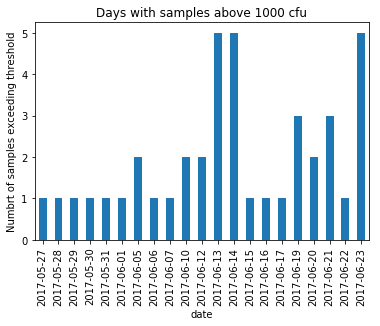

In [8]:
beach_days.loc[beach_days['dna_reading_mean'] >= 1000].groupby('date').count()['location']\
    .plot(kind="bar", title="Days with samples above 1000 cfu").set_ylabel("Numbrt of samples exceeding threshold")

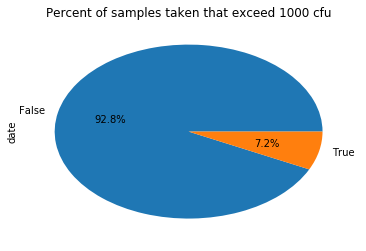

In [9]:
# Samples that exceed threshold
beach_days['dna_exceeds'] = beach_days['dna_reading_mean'] > 1000
beach_days.groupby('dna_exceeds').count()['date'].plot(kind="pie", title="Percent of samples taken that exceed 1000 cfu", autopct='%1.1f%%')

In [11]:
# What have been the highest readings so far?
beach_days.sort_values('dna_reading_mean', ascending=False)[['beach_name', 'date', 'dna_reading_mean']].head(20)

,beach_name,date,dna_reading_mean
210,63rd Street,2017-06-13,9386.074046
7,Humboldt,2017-06-23,7451.962963
80,Ohio Street,2017-06-19,6264.337954
169,Humboldt,2017-06-15,6083.474829
510,Humboldt,2017-05-29,5669.991182
3,63rd Street,2017-06-23,5393.683435
496,Humboldt,2017-05-30,4565.198791
69,63rd Street,2017-06-20,3794.843080
203,Montrose,2017-06-13,3619.694186
357,Montrose,2017-06-05,3223.844289
